## Polynomial Regression

공부 시간에 따른 시험 점수 (우등생)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X,y

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2],
        [2.4],
        [2.5],
        [2.6],
        [2.9],
        [3.1],
        [3.2],
        [3.3],
        [3.7],
        [3.9],
        [4. ],
        [4.1],
        [4.2],
        [4.4],
        [4.7],
        [4.8]]),
 array([  2,   4,   6,   4,   6,  14,  10,  12,  24,  26,  32,  46,  44,
         52,  58,  54,  68,  80,  84, 100], dtype=int64))

## 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

### 데이터 시각화 (전체)

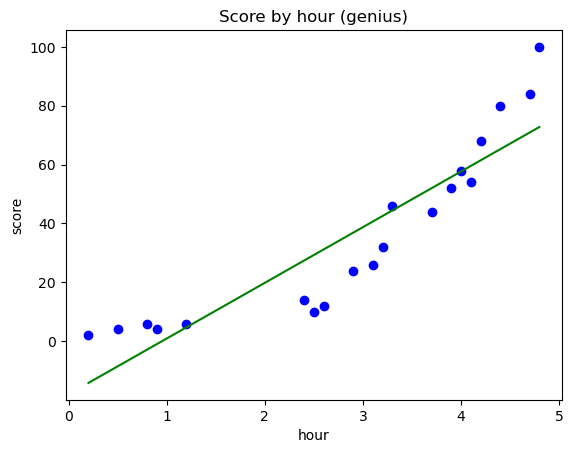

In [4]:
plt.scatter(X,y,color='blue') #산정도
plt.plot(X,reg.predict(X),color='green') # 선 그래프
plt.title('Score by hour (genius)') # 제목
plt.xlabel('hour') # X축제목
plt.ylabel('score') # Y축제목
plt.show()

In [5]:
reg.score(X,y)

0.8169296513411765

### 다항 회귀 

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # 2차
X_poly = poly_reg.fit_transform(X)
X[:5],X_poly[:5]

(array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]),
 array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
        [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
        [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
        [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
        [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]]))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 X와 y를 가지고 모델 생성 학습

LinearRegression()

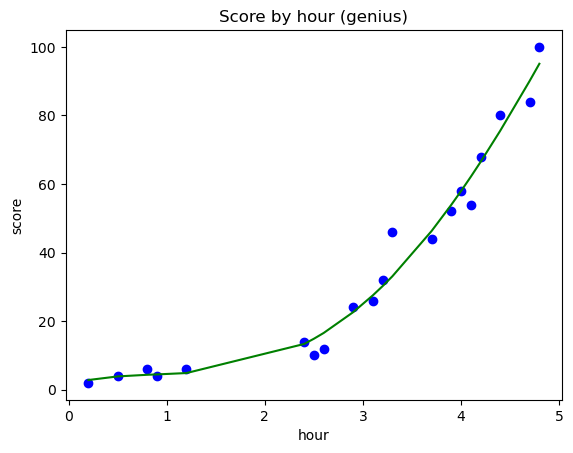

In [8]:
plt.scatter(X,y,color='blue') #산정도
plt.plot(X,lin_reg.predict(X_poly),color='green') # 선 그래프
plt.title('Score by hour (genius)') # 제목
plt.xlabel('hour') # X축제목
plt.ylabel('score') # Y축제목
plt.show()

In [9]:
X_range = np.arange(min(X),max(X),0.1) 
X_range = X_range.reshape(-1, 1) # = reshape(len(X_range), 1) row개수는 자동으로 계산 ,column개수는 1개

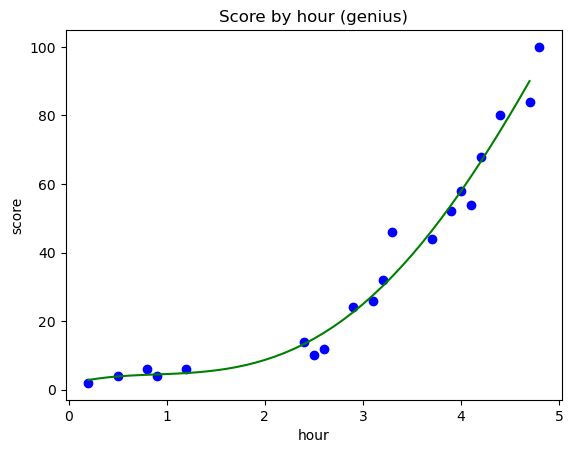

In [10]:
plt.scatter(X,y,color='blue') #산정도
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green') # 선 그래프
plt.title('Score by hour (genius)') # 제목
plt.xlabel('hour') # X축제목
plt.ylabel('score') # Y축제목
plt.show()

## 공부시간에 따른 시험 성적 예측

In [11]:
reg.predict([[2]])

array([19.85348988])

In [12]:
lin_reg.predict(poly_reg.fit_transform([[2]]))

array([8.70559135])

In [13]:
lin_reg.score(poly_reg.fit_transform(X),y)

0.9782775579000045